#### Time_stretch <h1>
É o processo de alteração da velocidade ou duração de um sinal de áudio sem afetar seu tom. Na librosa existe o método "time_stretch", cujo recebe um rate como parametro se ele for maior que 1 o sinal é acelerado, caso não o sinal é retardado.




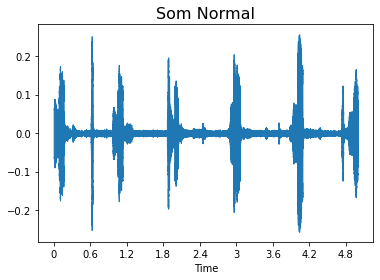

In [18]:

import librosa
from librosa.effects import time_stretch
import librosa.display as ld
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load("./base_2.wav")
yfast = time_stretch(y, rate=0.5)

plt.title("Som Normal", size = 16)
librosa.display.waveshow(y ,sr = sr)
Audio(data= y, rate= sr)



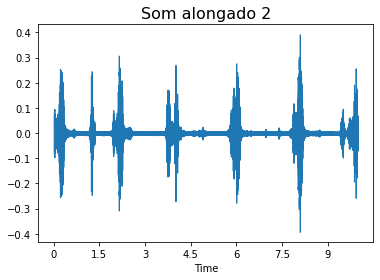

In [19]:
plt.title("Som alongado 2", size = 16)
librosa.display.waveshow(yfast ,sr = sr)
Audio(data= yfast, rate= sr)

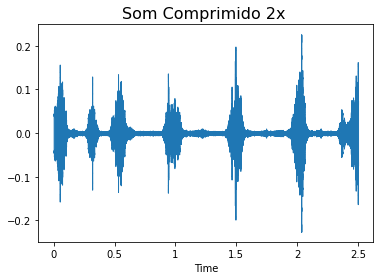

In [20]:
y, sr = librosa.load("./base_2.wav")
yfast = time_stretch(y, rate=2)

plt.title("Som Comprimido 2x ", size = 16)
librosa.display.waveshow(yfast ,sr = sr)
Audio(data= yfast, rate= sr)

# Pitch Shift

Um pitch shifter é uma unidade de efeitos sonoros que aumenta ou diminui o tom de um sinal de áudio por um intervalo predefinido .
Na librosa existe o método pitch_shift.
Mude o tom de uma forma de onda por n_steps etapas.
Um passo é igual a um semitom se bins_per_octavefor definido como 12.

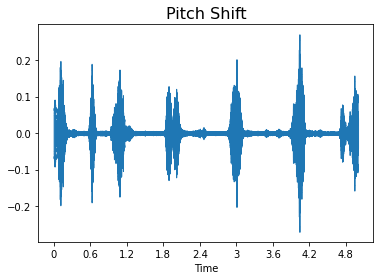

In [21]:
#Subir uma terça maior
y_third = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
plt.title("Pitch Shift", size = 16)
librosa.display.waveshow(y_third ,sr = sr)
Audio(data= y_third, rate= sr)

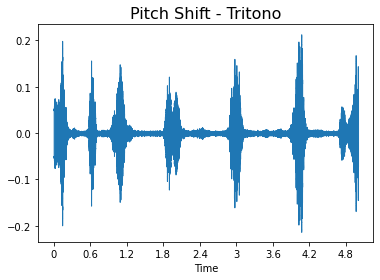

In [22]:
#Desloque para baixo por um trítono 
y_tritone = librosa.effects.pitch_shift(y, sr=sr, n_steps=-6)
plt.title("Pitch Shift - Tritono", size = 16)
librosa.display.waveshow(y_tritone ,sr = sr)
Audio(data= y_tritone, rate= sr)


### Background Noise
Misturar a amostra com outra gravação contendo sons de fundo de diferentes tipos de cenas acústicas.
De cada sinal de ruído de fundo, os clipes n_samples são extraídos aleatoriamente e misturados com o áudio de entrada com um coeficiente de mixagem aleatório amostrado uniformemente entre weight_min e weight_max .


In [37]:
from muda.muda import load_jam_audio
from muda.muda import deformers
from muda.muda.core import save
import os

lista = []
for i,j,k in os.walk('./sample/'):
    for l in k:
        path = i + l
        lista.append(path)

j_orig = load_jam_audio(jam_in=None, audio_file='base_2.wav')
pitch = deformers.BackgroundNoise(n_samples=3,files=lista )
for i, jam_out in enumerate(pitch.transform(j_orig)):
    save('output_{:02d}.wav'.format(i),'output_{:02d}.jams'.format(i),jam_out)



c:\Users\david\OneDrive\Área de Trabalho\tcc\yamnet\muda\muda\deformers\background.py:107: FutureWarning: Pass orig_sr=44100, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.resample(y, soundf.samplerate, sr)
c:\Users\david\OneDrive\Área de Trabalho\tcc\yamnet\muda\muda\deformers\background.py:110: FutureWarning: Pass size=110250 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(y, n_samples)


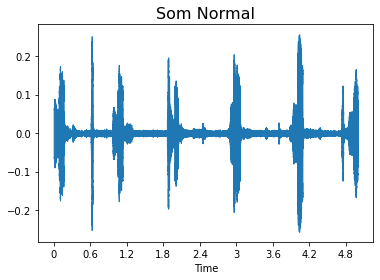

In [27]:
y, sr = librosa.load("./base_2.wav")

plt.title("Som Normal", size = 16)
librosa.display.waveshow(y ,sr = sr)
Audio(data= y, rate= sr)

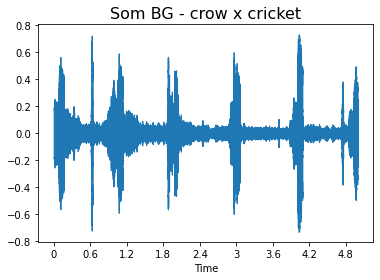

In [43]:
y_bg, sr_bg = librosa.load("./output_01.wav")
plt.title("Som BG - crow x cricket", size = 16)
librosa.display.waveshow(y_bg ,sr = sr_bg)
Audio(data= y_bg, rate= sr)